<center>

# Program No. 4
</center>

### <strong> Objective: </strong>Build a Deep Feed Forward ANN by implementing the Backpropagation algorithm and test the same using appropriate data sets. Use the number of hidden layers >=4.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Sigmoid Activation Function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [4]:
# XOR Input and Output
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])


In [5]:
np.random.seed(1)  # For reproducibility

# Network architecture
layers = [2, 5, 4, 4, 3, 1]  # Input, 4 hidden, Output

# Initialize weights and biases
weights = [np.random.uniform(-1, 1, (layers[i], layers[i+1])) for i in range(len(layers)-1)]
biases = [np.random.uniform(-1, 1, (1, layers[i+1])) for i in range(len(layers)-1)]

# Learning rate and epochs
lr = 0.5
epochs = 10000
loss_history = []



In [6]:

for epoch in range(epochs):
    # ---- Forward Propagation ----
    activations = [X]
    inputs = []

    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        inputs.append(z)
        a = sigmoid(z)
        activations.append(a)

    # ---- Backward Propagation ----
    error = y - activations[-1]
    deltas = [error * sigmoid_derivative(activations[-1])]

    for i in reversed(range(len(weights)-1)):
        delta = deltas[-1].dot(weights[i+1].T) * sigmoid_derivative(activations[i+1])
        deltas.append(delta)

    deltas.reverse()

    # ---- Weights & Biases Update ----
    for i in range(len(weights)):
        weights[i] += activations[i].T.dot(deltas[i]) * lr
        biases[i] += np.sum(deltas[i], axis=0, keepdims=True) * lr

    # ---- Store Loss ----
    loss_history.append(np.mean(np.abs(error)))

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} - Loss: {loss_history[-1]:.4f}")


Epoch 0 - Loss: 0.5000
Epoch 1000 - Loss: 0.5000
Epoch 2000 - Loss: 0.5000
Epoch 3000 - Loss: 0.5000
Epoch 4000 - Loss: 0.5000
Epoch 5000 - Loss: 0.5000
Epoch 6000 - Loss: 0.5000
Epoch 7000 - Loss: 0.5000
Epoch 8000 - Loss: 0.5000
Epoch 9000 - Loss: 0.5000


In [7]:
# Final prediction after training
final_input = X
for i in range(len(weights)):
    final_input = sigmoid(np.dot(final_input, weights[i]) + biases[i])

print("\nFinal Predictions:\n", np.round(final_input, 3))



Final Predictions:
 [[0.5  ]
 [0.499]
 [0.501]
 [0.5  ]]


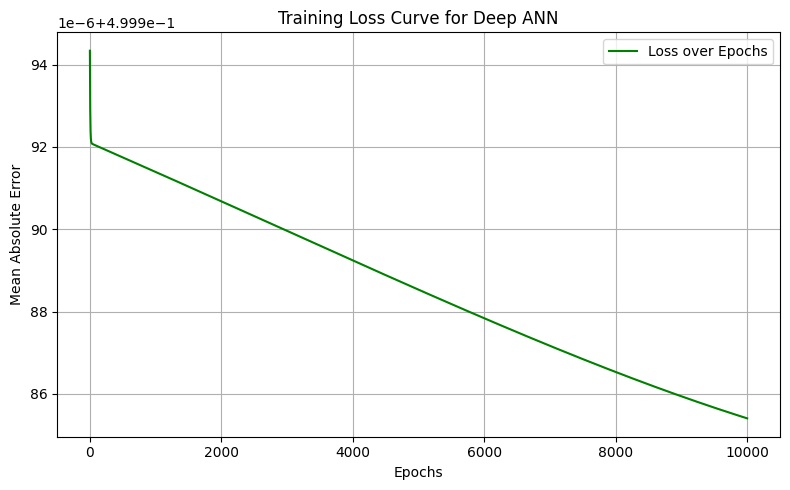

In [8]:
plt.figure(figsize=(8,5))
plt.plot(loss_history, color='green', label='Loss over Epochs')
plt.title('Training Loss Curve for Deep ANN')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
